# **DIPLOMATURA UNIVERSITARIA EN CIENCIA DE DATOS**

# Módulo 5: Aprendizaje No Supervisado

## Clustering:  K-Means, Mezcla de Gaussianas.

## **Docentes:** Lic. Luis Duarte - Dra. Griselda Bobeda  - Dra. Magdalena Lucini

### Noviembre 2024, FaCENA - UNNE

### Contacto:  
* luis.duarte@comunidad.unne.edu.ar;
* griseldabobeda@gmail.com;
* mmlucini@comunidad.unne.edu.arr



**Objetivos:**

*   Aplicar técnicas de clustering a bases de datos reales.
*   Comparar agrupaciones con diferentes ténicas.

**Antes de empezar:**

Necesitamos importar las siguientes librerías:

In [1]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import matplotlib.cm as cm # Import the cm module from matplotlib
import plotly.figure_factory as ff#visualization

## **Caso 1: Base de Datos de Países**

Luego de obtener alrededor de 10 millones de dólares por los programas de financiamiento actuales, el CEO de la ONG Internacional Humanitaria debe decidir de manera estratégica y eficaz cómo distribuir estos fondos. La principal dificultad al tomar esta decisión radica en identificar cuáles países necesitan más ayuda. Nuestro objetivo es agrupar a los países utilizando factores socioeconómicos y de salud que reflejan su nivel de desarrollo. A partir de este análisis, debemos proponer qué países deben recibir mayor atención y prioridad en la asignación de estos recursos.


### Importación de datos:
------------------------------------------
Importemos la base de datos 'paises.csv'.


In [3]:
uploaded = files.upload()

Saving Country.csv to Country.csv


In [4]:
paises = pd.read_csv(io.BytesIO(uploaded['Country.csv']))

*   Observe qué variables tiene la base de datos.
*   Obtenga las medidas de resumen para las variables.


In [ ]:
paises

In [6]:
paises1=paises.drop(['country'],axis=1)

In [ ]:
paises1.head()

La base de datos "paises.csv" corresponde a 167 países del mundo, junto a variables socio-económicas de los mismos. Fue extraída de https://www.kaggle.com/datasets/vipulgohel/clustering-pca-assignment/data .


* `country`: Nombre del país.
* `child_mort`: Muertes de niños menores de 5 años por cada 1000 nacidos vivos.
* `exports`: Exportaciones de bienes y servicios. Dado como porcentaje del PIB total.
* `health`: Gasto total en salud como porcentaje del PIB total.
* `imports`: Importaciones de bienes y servicios. Dado como porcentaje del PIB total.
* `Income`: Ingreso neto por persona.
* `Inflation`: Medición de la tasa de crecimiento anual del PIB total.
* `life_expec`: Promedio de años que viviría un recién nacido si se mantienen los patrones actuales de mortalidad.
* `total_fer`: Número de hijos que nacerían por mujer si se mantienen las tasas actuales de fertilidad por edad.
* `gdpp`: PIB per cápita. Calculado como el PIB total dividido por la población total.

Transformemos los valores porcentuales en valores absolutos:

In [7]:
paises1['exports'] = paises1['exports']*paises1['gdpp']/100
paises1['imports'] = paises1['imports']*paises1['gdpp']/100
paises1['health'] = paises1['health']*paises1['gdpp']/100

Veamos cómo se distribuyen los datos:

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(paises1.life_expec, paises1.health,'b*')
axs[0, 0].set_xlabel('life_expec')
axs[0, 0].set_ylabel('healt')
axs[0, 0].set_title('Diagrama de Dispersión')

axs[0, 1].plot(paises1.child_mort, paises1.total_fer, 'b*')
axs[0, 1].set_xlabel('child_mort')
axs[0, 1].set_ylabel('total_fer')
axs[0, 1].set_title('Diagrama de Dispersión')


axs[1, 0].plot(paises1.income	, paises1.gdpp, 'b*')
axs[1, 0].set_xlabel('income')
axs[1, 0].set_ylabel('gdpp')
axs[1, 0].set_title('Diagrama de dispersión')

axs[1, 1].plot(paises1.life_expec, paises1.total_fer	, 'b*')
axs[1, 1].set_xlabel('life_expec')
axs[1, 1].set_ylabel('total_fer')
axs[1, 1].set_title('Diagrama de dispersión')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

* Como vimos, las variables en la base poseen escalas muy distintas por lo que es necesario escalarlas.

In [8]:
scaler = StandardScaler()
paises_esc = scaler.fit_transform(paises1)

### **1.1 Aplicamos PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(paises_esc)

In [ ]:
#Proporción de Varianza Explicada
fig = plt.figure(figsize = (12,5))
plt.plot(np.arange(1,10),pca.explained_variance_ratio_)
plt.title('Gráfico de Sedimentación', fontsize=14)
plt.xlabel('Número de Componentes', fontsize=12, fontweight='bold')
plt.ylabel('Varianza Explicada', fontsize=12,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

In [ ]:
#Proporción Acumulada de Varianza Explicada
fig = plt.figure(figsize = (12,5))
plt.plot(np.arange(1,10),np.cumsum(pca.explained_variance_ratio_))
plt.title('Gráfico de Sedimentación', fontsize=14)
plt.xlabel('Número de Componentes', fontsize=12, fontweight='bold')
plt.ylabel('Varianza Explicada', fontsize=12,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

In [ ]:
#Proporción Acumulada de Varianza Explicada
np.cumsum(pca.explained_variance_ratio_)


Podemos ver que con 5 componentes podemos describir el 98% de la variabilidad de los datos.

In [ ]:
colnames = list(paises1.columns)
prinComp_df = pd.DataFrame({ 'Variable':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})
prinComp_df

In [ ]:
ig = plt.figure(figsize = (16,10))
plt.scatter(prinComp_df.PC1, prinComp_df.PC2)
plt.xlabel('Componente Principal 1',fontsize=16, fontweight='bold')
plt.ylabel('Componente Principal 2',fontsize=16, fontweight='bold')
for i, txt in enumerate(prinComp_df.Variable):
    plt.annotate(txt, (prinComp_df.PC1[i],prinComp_df.PC2[i]),fontsize=16,  horizontalalignment='right')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

* El gráfico muestra que la primera componente principal se observa en la dirección donde el PIB per cápita (gdpp), los ingresos, las exportaciones y la esperanza de vida son altos; y donde la mortalidad infantil y el número de hijos son bajos.

* De manera similar, la segunda componente principal se observa donde la mortalidad infantil y el número de hijos son mayores; y la esperanza de vida es menor.

In [ ]:
pcaf = PCA(n_components=5)
paises_pca = pd.DataFrame(pcaf.fit_transform(paises_esc))
paises_pca.columns = ['PC1','PC2','PC3','PC4', 'PC5']
paises_pca.head()


### **1.2 Clustering: K-means**

#### **1.2.1: Aplicación de la función `KMeans`**

Una vez escalados los datos, y de ser el caso, preprocesados, procemos a generar los clusters. Tenemos que decidir:
1. **¿Elegimos los centroides o los definimos de manera aleatoria?**

Una opción es (la que seguiremos en este curso) generar los centroides de manera aleatoria utilizando la función `KMeans` de la librería `sklearn`.


2.   **¿Cuántos clusters formamos?**


*   **Regla de Hartigan**: Considera la diferencia entre la SCD (Suma de Cuadrados Dentro) con $g$ y $g +1$ grupos, analizando la reducción de variabilidad relativa tras un agrupamiento adicional:
$$F=\cfrac{\mathbf{W}_g-\mathbf{W}_{g+1}}{\cfrac{\mathbf{W}_{g+1}}{n-g-1}}$$
donde $\mathbf{W}_g$ es la suma de cuadrados dentro, para $g$ grupos.\
Hartigan (1975) sugiere introducir un grupo más si $F>10$.

*   **Coeficiente de Silhouette (SC)**: Es una métrica de validación interna empleada para la elección de medida de distancia, algoritmo de aglomeración o número de clusters a considerar. Nos proporciona una medida de cuán similar es un objeto a su propio grupo (cohesión) en comparación con otros grupos (separación).\
Rousseew(1987) propuso la siguiente interpretación del coeficiente SC:
     *   0.71-1: estructura fuerte.
     *   0.51-0.7: se encontró una estructura razonable.
     *   0.26-0.5: estructura débil y podría ser artificial.
     *   menor a 0.25: sin estructura sustancial.

Teniendo en cuenta lo anterior, crearemos diferentes estructuras utilizando 2, 3, 4, 5, 6, 7 y 8 clusters y, utilizando la reglas propuestas
, decidiremos con cuántos clusters trabajaremos.

In [ ]:
from sklearn.cluster import KMeans
# Referencias en https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html
from sklearn.metrics import silhouette_samples, silhouette_score
# Referencias en https://scikit-learn.org/1.5/modules/model_evaluation.html

In [ ]:
# Definir el rango de números de clusters
num_clusters = range(2,9)

# Lista para almacenar la inercia (SCD)
SCD = []

# Calcular la inercia para cada número de clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(paises_pca)
    inertia = kmeans.inertia_
    SCD.append(inertia)

# Mostrar la inercia para cada número de clusters
for k, inertia in zip(num_clusters, SCD):
    print(f'Número de Clusters: {k}, Inercia: {inertia}')

In [ ]:
# Dibujar un gráfico de codo para visualizar la inercia
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, SCD, marker='o', linestyle='-')
plt.title('Gráfico de Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Cuadrados Dentro')
plt.show()

In [ ]:
#Calculamos los valores de F
for k in range(len(SCD)-1):
  F=(SCD[k]-SCD[k+1])/(SCD[k+1]/(len(paises_esc)-k-3))
  print(F)

Luego, de acuerdo a la regla de Hartigan, nos quedamos con 5 clusters.

* Analice el siguiente código y obtenga conclusiones.


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 6)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(paises_esc) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(paises_esc)
    silhouette_avg = silhouette_score(paises_esc, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "el CS es:", silhouette_avg)

    sample_silhouette_values = silhouette_samples(paises_esc, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Gráfico de Coeficiente de Silueta")
    ax1.set_xlabel("CS")
    ax1.set_ylabel("Nombre del Cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Análisis de silueta para Clustering por K-Means con n_clusters= %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### **1.2.2 Veamos cómo quedan conformados los 5 grupos**

In [ ]:
km = KMeans(n_clusters= 5, max_iter=50)
km.fit(paises_pca)
clusters = km.labels_ #indica a qué cluster es asignado cada país.

In [ ]:
paises_clusters=paises_pca.copy() #Hago una copia de la base original
paises_clusters['kmeans_5'] = km.labels_ #Agrego los clusters
paises_clusters

* Grafiquemos los datos en las dos primeras componentes principales y veamos su estructura.

In [ ]:
kmean_clusters = go.Scatter(x=paises_clusters['PC1'], y=paises_clusters['PC2'],
                           mode='markers',
                           text=paises['country'].tolist(),
                           marker=dict(
                                size=5,
                                color = paises_clusters['kmeans_5'].astype(float), #set color equal to a variable
                                colorscale='Viridis',
                                showscale=False)
                           )
layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='PC1'),
                yaxis=dict(title='PC2'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=kmean_clusters, layout=layout)
fig.show(renderer="colab")

* Veamos el número de países por cluster:

In [ ]:
print(paises_clusters['kmeans_5'].value_counts())

#### **1.2.3 Analicemos cada uno de los clusters.**

In [ ]:
paises_nuevo=pd.merge(paises,paises_clusters, left_index=True,right_index=True)
paises_nuevo.head(2)

In [ ]:
#Eliminamos las Componentes Principales y nos quedamos con las variables originales
paises_nuevo=paises_nuevo.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
paises_nuevo.head(2)

* Media de cada variable agrupada por cluster.



In [ ]:
cluster_child_mort=pd.DataFrame(paises_nuevo.groupby(["kmeans_5"]).child_mort.mean())
cluster_exports=pd.DataFrame(paises_nuevo.groupby(["kmeans_5"]).exports.mean())
cluster_health=pd.DataFrame(paises_nuevo.groupby(["kmeans_5"]).health.mean())
cluster_imports=pd.DataFrame(paises_nuevo.groupby(["kmeans_5"]).imports.mean())
cluster_income=pd.DataFrame(paises_nuevo.groupby(["kmeans_5"]).income.mean())
cluster_inflation=pd.DataFrame(paises_nuevo.groupby(["kmeans_5"]).inflation.mean())
cluster_life_expec=pd.DataFrame(paises_nuevo.groupby(["kmeans_5"]).life_expec.mean())
cluster_total_fer=pd.DataFrame(paises_nuevo.groupby(["kmeans_5"]).total_fer.mean())
cluster_gdpp=pd.DataFrame(paises_nuevo.groupby(["kmeans_5"]).gdpp.mean())

In [ ]:
# Armamos un data frame con las medias de cada variable por cluster.
media_clust=pd.concat([cluster_child_mort,cluster_exports,cluster_health,cluster_imports,cluster_income,cluster_inflation,cluster_life_expec, cluster_total_fer,cluster_gdpp],axis=1).reset_index()
media_clust

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(221)
media_clust.plot.bar(x='kmeans_5', y='income', rot=0, legend=False, fontsize=12, color=['g', 'b', 'r'], ax=ax1)
ax1.set_title('K-Means: Países por grupo \nbasado en Ingreso Neto por Persona', fontsize=14, fontweight='bold')
ax1.set_ylabel('Ingreso Neto por Persona', fontsize=12, fontweight='bold')
ax1.set_xlabel('Países por Grupo', fontsize=12, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=11, labelrotation=0)

ax2 = fig.add_subplot(222)
media_clust.plot.bar(x='kmeans_5', y='gdpp', rot=0, legend=False, fontsize=12, color=['g', 'b', 'r'], ax=ax2)
ax2.set_title('K-Means: Países por grupo \nbasado en PIB per cápita', fontsize=14, fontweight='bold')
ax2.set_ylabel('PIB per cápita', fontsize=12, fontweight='bold')
ax2.set_xlabel('Países por Grupo', fontsize=12, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=11, labelrotation=0)

ax3 = fig.add_subplot(223)
media_clust.plot.bar(x='kmeans_5', y='health', rot=0, legend=False, fontsize=12, color=['g', 'b', 'r'], ax=ax3)
ax3.set_title('K-Means: Países por grupo \nbasado en Gasto total en salud', fontsize=14, fontweight='bold')
ax3.set_ylabel('Gasto total en salud', fontsize=12, fontweight='bold')
ax3.set_xlabel('Países por Grupo', fontsize=12, fontweight='bold')
ax3.tick_params(axis='both', which='major', labelsize=11, labelrotation=0)

ax4 = fig.add_subplot(224)
media_clust.plot.bar(x='kmeans_5', y='child_mort', rot=0, legend=False, fontsize=12, color=['g', 'b', 'r'], ax=ax4)
ax4.set_title('K-Means: Países por grupo \nbasado en Muertes de niños menores de 5 años', fontsize=14, fontweight='bold')
ax4.set_ylabel('Muertes de niños menores de 5 años', fontsize=12, fontweight='bold')
ax4.set_xlabel('Países por Grupo', fontsize=12, fontweight='bold')
ax4.tick_params(axis='both', which='major', labelsize=11, labelrotation=0)

plt.tight_layout()  # Asegura que no haya solapamientos
plt.show()


* ¿Podrían renombrar a cada  grupo?

### **1.3 Gaussian Mixture Models**

In [12]:
from sklearn.mixture import GaussianMixture
#Referencias en: https://scikit-learn.org/dev/modules/generated/sklearn.mixture.GaussianMixture.html

In [ ]:
gmm = GaussianMixture(n_components=5)
gmm.fit(paises_pca)

In [ ]:
gmm.predict_proba(paises_pca)[:2]

In [ ]:
pred=gmm.fit_predict(paises_pca)
pred

In [ ]:
gmm_clusters = go.Scatter(x=paises_pca['PC1'], y=paises_pca['PC2'],
                           mode='markers',
                           text=paises['country'].tolist(),
                           marker=dict(
                                size=5,
                                color = pred.astype(float), #set color equal to a variable
                                colorscale='Viridis',
                                showscale=False)
                           )
layout = go.Layout(title="Clustering con GMM ",titlefont=dict(size=20),
                xaxis=dict(title='PC1'),
                yaxis=dict(title='PC2'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=gmm_clusters, layout=layout)
fig.show(renderer="colab")

In [ ]:
kmean_clusters = go.Scatter(x=paises_clusters['PC1'], y=paises_clusters['PC2'],
                           mode='markers',
                           text=paises['country'].tolist(),
                           marker=dict(
                                size=5,
                                color = paises_clusters['kmeans_5'].astype(float), #set color equal to a variable
                                colorscale='Viridis',
                                showscale=False)
                           )
layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='PC1'),
                yaxis=dict(title='PC2'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=kmean_clusters, layout=layout)

fig.show(renderer="colab")

* Veamos el número de países por cluster:

In [ ]:
print(pd.Series(pred).value_counts())


#### **1.3.1  Veamos si GMM también requiere de cinco clusters. Para ello, analizaremos los siguientes criterios:**

* **Coeficiente de Silhouette (SC):** Dado que el proceso de ajuste no es determinista, se sugiere ejecutar varias veces por cada número de clusters y luego considerar el valor medio y la desviación estándar de las cinco mejores ejecuciones.
*   **Distancia entre GMMs:** Se forman dos conjuntos de datos, cada uno con la mitad de datos elegidos al azar. Luego, se verifica qué tan similares son los GMMs entrenados en los dos conjuntos para cada configuración. Al trabajar con distribuciones, el concepto de similitud se incorpora en la métrica de Jensen-Shannon (JS). Cuanto menor sea la distancia JS entre los dos GMMs, más estarán de acuerdo los GMMs en cómo ajustar los datos. Es decir, cuanto menor sea la distancia, mejor será el agrupamiento.

*  **Criterio de información bayesiana (BIC):** Este criterio nos proporciona una estimación de qué tan bueno es el GMM en términos de predecir los datos que realmente tenemos. Cuanto menor sea el BIC, mejor será el modelo para predecir los datos existentes. Para evitar el sobreajuste, esta técnica penaliza a los modelos con un gran número de clusters.

**1.3.1.1 Coeficiente de Silhouette:**

In [ ]:
def SelBest(arr:list, X:int)->list:
    '''
    Devuelve el conjunto de configuraciones de X con la menor distancia más.
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
from sklearn import metrics

n_clusters=np.arange(2, 9)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(paises_pca)
        labels=gmm.predict(paises_pca)
        sil=metrics.silhouette_score(paises_pca, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

In [ ]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Coeficiente de Silhouette", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Número de Clusters")
plt.ylabel("CS")

**1.3.1.2 Distancia entre GMMs:**

In [ ]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)


In [ ]:
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore", category=UserWarning)

n_clusters=np.arange(2, 9)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]

    for iteration in range(iterations):
        train, test=train_test_split(paises_pca, test_size=0.5)

        gmm_train=GaussianMixture(n, n_init=2).fit(train)
        gmm_test=GaussianMixture(n, n_init=2).fit(test)
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)


In [ ]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distancia entre GMMs de entrenamiento y prueba", fontsize=18)
plt.xticks(n_clusters)
plt.xlabel("Número de clusters")
plt.ylabel("Distancia")
plt.show()


**1.3.1.3 BIC:**

In [ ]:
n_clusters=np.arange(2, 9)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(paises_pca)
        tmp_bic.append(gmm.bic(paises_pca))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

In [ ]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Coeficientes", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Número de clusters")
plt.ylabel("Coeficientes")
plt.legend()

Los dos primeros criterios sugieren trabajar con dos clusters, mientras que el coeficiente BIC sugiere entre seis y siete. Podemos probar con un número intermedio: tres clusters.

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(paises_pca)

In [ ]:
clusters = gmm.fit_predict(paises_pca)
paises_gmm=paises_pca.copy() #Hago una copia de la base original
paises_gmm['gmm_3'] = clusters #Agrego los clusters
paises_gmm

In [ ]:
gmm_clusters = go.Scatter(x=paises_gmm['PC1'], y=paises_gmm['PC2'],
                           mode='markers',
                           text=paises['country'].tolist(),
                           marker=dict(
                                size=5,
                                color = paises_gmm['gmm_3'].astype(float), #set color equal to a variable
                                colorscale='Viridis',
                                showscale=False)
                           )
layout = go.Layout(title="Clustering GMM ",titlefont=dict(size=20),
                xaxis=dict(title='PC1'),
                yaxis=dict(title='PC2'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=gmm_clusters, layout=layout)
fig.show(renderer="colab")

* Veamos el número de países por cluster:

In [ ]:
print(pd.Series(clusters).value_counts())

#### **1.3.2 Analicemos cada uno de los clusters.**


In [ ]:
paises_nuevo_gmm=pd.merge(paises,paises_gmm, left_index=True,right_index=True)
paises_nuevo_gmm.head()

In [ ]:
#Eliminamos las Componentes Principales y nos quedamos con las variables originales
paises_nuevo_gmm=paises_nuevo_gmm.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
paises_nuevo_gmm.head()

* Media de cada variable agrupada por cluster.

In [ ]:
gmm_child_mort=pd.DataFrame(paises_nuevo_gmm.groupby(["gmm_3"]).child_mort.mean())
gmm_exports=pd.DataFrame(paises_nuevo_gmm.groupby(["gmm_3"]).exports.mean())
gmm_health=pd.DataFrame(paises_nuevo_gmm.groupby(["gmm_3"]).health.mean())
gmm_imports=pd.DataFrame(paises_nuevo_gmm.groupby(["gmm_3"]).imports.mean())
gmm_income=pd.DataFrame(paises_nuevo_gmm.groupby(["gmm_3"]).income.mean())
gmm_inflation=pd.DataFrame(paises_nuevo_gmm.groupby(["gmm_3"]).inflation.mean())
gmm_life_expec=pd.DataFrame(paises_nuevo_gmm.groupby(["gmm_3"]).life_expec.mean())
gmm_total_fer=pd.DataFrame(paises_nuevo_gmm.groupby(["gmm_3"]).total_fer.mean())
gmm_gdpp=pd.DataFrame(paises_nuevo_gmm.groupby(["gmm_3"]).gdpp.mean())


In [ ]:
media_clust_gmm=pd.concat([gmm_child_mort,gmm_exports,gmm_health,gmm_imports,gmm_income,gmm_inflation,gmm_life_expec, gmm_total_fer,gmm_gdpp],axis=1).reset_index()
media_clust_gmm

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(221)
media_clust_gmm.plot.bar(x='gmm_3', y='income', rot=0, legend=False, fontsize=12, color=['g', 'b', 'r'], ax=ax1)
ax1.set_title('GMM: Países por grupo \nbasado en Ingreso Neto por Persona', fontsize=14, fontweight='bold')
ax1.set_ylabel('Ingreso Neto por Persona', fontsize=12, fontweight='bold')
ax1.set_xlabel('Países por Grupo', fontsize=12, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=11, labelrotation=0)

ax2 = fig.add_subplot(222)
media_clust_gmm.plot.bar(x='gmm_3', y='gdpp', rot=0, legend=False, fontsize=12, color=['g', 'b', 'r'], ax=ax2)
ax2.set_title('GMM: Países por grupo \nbasado en PIB per cápita', fontsize=14, fontweight='bold')
ax2.set_ylabel('PIB per cápita', fontsize=12, fontweight='bold')
ax2.set_xlabel('Países por Grupo', fontsize=12, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=11, labelrotation=0)

ax3 = fig.add_subplot(223)
media_clust_gmm.plot.bar(x='gmm_3', y='health', rot=0, legend=False, fontsize=12, color=['g', 'b', 'r'], ax=ax3)
ax3.set_title('GMM: Países por grupo \nbasado en Gasto total en salud', fontsize=14, fontweight='bold')
ax3.set_ylabel('Gasto total en salud', fontsize=12, fontweight='bold')
ax3.set_xlabel('Países por Grupo', fontsize=12, fontweight='bold')
ax3.tick_params(axis='both', which='major', labelsize=11, labelrotation=0)

ax4 = fig.add_subplot(224)
media_clust_gmm.plot.bar(x='gmm_3', y='child_mort', rot=0, legend=False, fontsize=12, color=['g', 'b', 'r'], ax=ax4)
ax4.set_title('GMM: Países por grupo \nbasado en Muertes de niños menores de 5 años', fontsize=14, fontweight='bold')
ax4.set_ylabel('Muertes de niños menores de 5 años', fontsize=12, fontweight='bold')
ax4.set_xlabel('Países por Grupo', fontsize=12, fontweight='bold')
ax4.tick_params(axis='both', which='major', labelsize=11, labelrotation=0)

plt.tight_layout()  # Asegura que no haya solapamientos
plt.show()

## **Caso 2: Segmentación de imágenes**

La segmentación es el proceso de dividir una imagen en regiones que comparten características similares. Una forma de segmentar una imagen es utilizando el color.

Este proceso es parecido al de cuantización de imágenes, pero con un propósito diferente: agrupar los píxeles para identificar y separar elementos relevantes de una imagen y así obtener información de alguno de ellos. Por ejemplo, se puede determinar el tamaño de un tumor en imágenes médicas, calcular el porcentaje de mica en una muestra de roca granítica, o medir el área de un lago en una fotografía aérea.

Tomemos como ejemplo el último caso. Con una imagen satelital del lago Victoria, que cubre un área aproximada de 210000 km², se podría calcular el área del lago basándose en el porcentaje que ocupa en la imagen.

### **2.1 Importemos la imagen 'Lago_Victoria.jpg'.**

In [25]:
uploaded = files.upload()

Saving Lago_Victoria.jpg to Lago_Victoria.jpg


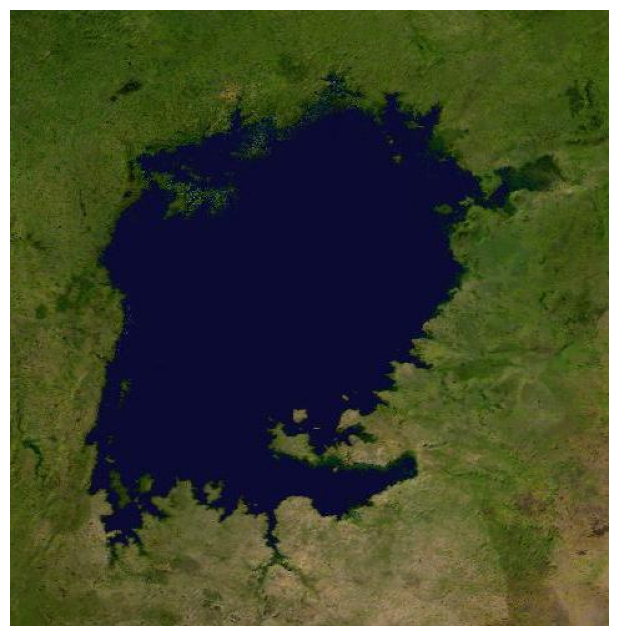

In [26]:
import cv2
I1 = cv2.imread("Lago_Victoria.jpg")
I=cv2.cvtColor(I1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(I)
plt.axis('off')
plt.show()

* ¿Qué dimensiones tiene la imagen?

In [ ]:
I.shape

(494, 480, 3)

* ¿Cómo preparamos la base para aplicar k-means?

In [ ]:
X=I.reshape(I.shape[0]*I.shape[1],3)

In [ ]:
X.shape

### **2.2 Agrupemos los píxeles en tres clústers.**

In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit(X)

In [ ]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

In [ ]:
I2 =  centroides[etiquetas].reshape(I.shape)
I2 = I.astype(np.uint8)


In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(I2)
plt.axis('off')
plt.show()

* Contamos el número de píxeles de color azul.

In [ ]:
I3 = (I2-np.min(I2))/(np.max(I2)-np.min(I2))*255
I3 = I3.astype(np.uint8)

unique_colors = np.unique(I3.reshape(-1, I3.shape[2]), axis=0)  # Obtener colores únicos
print("Colores únicos en la imagen segmentada:")
print(unique_colors)  # Mostrar los colores únicos
print("Número de colores únicos:", len(unique_colors))

In [ ]:
color_buscado = np.array([0, 5, 90])

pixeles_coincidentes = np.all(I3 == color_buscado, axis=-1)

numero_de_pixeles = np.sum(pixeles_coincidentes)

print(f"Número de píxeles con el color {color_buscado}: {numero_de_pixeles}")

Hay 77303 píxeles con intensidad [0 5 90], que corresponde al lago. Calculamos el porcentaje respecto al número total de píxeles de la foto y tenemos el porcentaje del área del lago respecto al área total representada por la foto

In [ ]:
print (u'Área = ',  float(210000)*float(numero_de_pixeles)/float(I3.size), 'km^2')

Área =  14304.951079622133 km^2


## **Caso 3: Segmentación de imágenes  (Ejercicio)**

Calcular el porcentaje de mica (es el mineral de color más oscuro) en la roca de granito cuya sección muestra la imagen "granito.jpg".

## **Caso 4: Tarjetas de Crédito**

Se pretende desarrollar una agrupación de clientes para definir una estrategia de marketing. El conjunto de datos resume el comportamiento de uso de aproximadamente 9000 titulares activos de tarjetas de crédito durante los últimos 6 meses. El archivo está a nivel de cliente y contiene 18 variables de comportamiento.

* `CUST_ID`: Identificación del titular de la tarjeta de crédito (Categórica).
*`BALANCE`: Monto del saldo restante en su cuenta para realizar compras.
*`BALANCE_FREQUENCY`: Frecuencia con la que se actualiza el saldo, puntuación entre 0 y 1 (1 = saldo actualizado con frecuencia, 0 = no se actualiza con frecuencia).
* `PURCHASES`: Monto de las compras realizadas desde la cuenta.
* `ONEOFF_PURCHASES`: Monto máximo de compra realizado de una sola vez.
* `INSTALLMENTS_PURCHASES`: Monto de las compras realizadas en cuotas.
* `CASH_ADVANCE`: Efectivo adelantado proporcionado por el usuario.
* `PURCHASES_FREQUENCY`: Frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = no se realizan compras con frecuencia).
* `ONEOFFPURCHASESFREQUENCY`: Frecuencia con la que se realizan compras de una sola vez (1 = compras frecuentes, 0 = no se realizan compras con frecuencia).
* `PURCHASESINSTALLMENTSFREQUENCY`: Frecuencia con la que se realizan compras en cuotas (1 = compras frecuentes, 0 = no se realizan compras con frecuencia).
* `CASHADVANCEFREQUENCY`: Frecuencia con la que se realiza el adelanto de efectivo.
* `CASHADVANCETRX`: Número de transacciones realizadas con "Efectivo Adelantado".
* `PURCHASES_TRX`: Número de transacciones de compra realizadas.
* `CREDIT_LIMIT`: Límite de la tarjeta de crédito para el usuario.
* `PAYMENTS`: Monto del pago realizado por el usuario.
* `MINIMUM_PAYMENTS`: Monto mínimo de pagos realizado por el usuario.
* `PRCFULLPAYMENT`: Porcentaje de pago completo realizado por el usuario.
* `TENURE`: Duración del servicio de tarjeta de crédito para el usuario.